# Amsterdam Airbnb Open Data Project

Prepared by: Shady Reda

### 1.Context:
Airbnb has revolutionized the way people travel by offering a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of (Amsterdam, North Holland, The Netherlands)

### 2.Content:
The following Airbnb activity is included dataset Summary information and metrics for listings in Amsterdam

By exploring this dataset, I'll be looking for answers for the below 3 questions:

1- Does the room type affect the pricing?

2- Who the neighborhood impacts the price of the listing?

3- What factors impact clients reviews?

In [201]:
# Business understanding we need to answer the following questions:

# 1- Does the room type affect the pricing?
# 2- Who the neighborhood impacts the price of the listing?
# 3- What factors impact clients reviews?

# Let's start by importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
# Data Understanding

# Read listing data frame
df=pd.read_csv(r"C:\Users\V14MNazmy\Downloads\listings(Amsterdam, North Holland, The Netherlands).csv")# please add our own path of data set

In [203]:
# Data Understanding
# Display columns in or data frame for exploratory analysis
df.columns 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [204]:
# Data Understanding
# Display data fram data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9659 non-null   int64  
 1   name                            9659 non-null   object 
 2   host_id                         9659 non-null   int64  
 3   host_name                       9659 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   9659 non-null   object 
 6   latitude                        9659 non-null   float64
 7   longitude                       9659 non-null   float64
 8   room_type                       9659 non-null   object 
 9   price                           5869 non-null   float64
 10  minimum_nights                  9659 non-null   int64  
 11  number_of_reviews               9659 non-null   int64  
 12  last_review                     86

In [205]:
# Data Understanding
# Display columns null values

df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               9659
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             3790
minimum_nights                       0
number_of_reviews                    0
last_review                       1027
reviews_per_month                 1027
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                             97
dtype: int64

#### Handlling Missing values:
1-Add checker function to check if the values of the missing data exceeded 50% if they do the couloum to be removed

2-Handling the missing values with less than (50%) Using imputing values :

 a) For columns with Categorical (object type) values to fill it with mode value (most repeated)
 
 b) For columns with Quantitative (numeric type) values to fill it with mean value (Average)

In [206]:
# Data Preparation
# Add a function that check data type and handle missing values

def handle_missing_values(df):
    for col in df.columns:
        # Check if more than 50% of the values are missing
        if df[col].isnull().mean() > 0.5:
            df.drop(col, axis=1, inplace=True)
        else:
            # Check if the column is categorical (object type) or quantitative (numeric type)
            if df[col].dtype == 'object':
                # Categorical data: fill missing values with the mode
                mode_value = df[col].mode()[0]
                df[col].fillna(mode_value, inplace=True)
            else:
                # Quantitative data: fill missing values with the mean
                mean_value = df[col].mean()
                df[col].fillna(mean_value, inplace=True)
    
    return df
df = handle_missing_values(df)

#### Why the Approach Was Used

1. **Checker Function for Missing Data Exceeding 50%**
   - **Reason**: If more than 50% of the data in a column is missing, it indicates that the column may not provide reliable information. Removing such columns helps in reducing noise and potential biases in the analysis.
   - **Benefit**: This approach ensures that the dataset remains manageable and that the analysis is based on more complete and reliable data.

2. **Imputing Values for Missing Data Less Than 50%**
   - **Reason**: For columns with less than 50% missing data, imputing values helps in retaining the column and making the dataset complete without losing significant information.

   a) **Categorical (Object Type) Values - Fill with Mode**
      - **Reason**: The mode is the most frequently occurring value in a column. Imputing missing categorical values with the mode ensures that the imputed values are representative of the most common category.
      - **Benefit**: This method maintains the distribution of the categorical data and minimizes the impact of missing values on the analysis.

   b) **Quantitative (Numeric Type) Values - Fill with Mean**
      - **Reason**: The mean is the average value of a column. Imputing missing numeric values with the mean helps in maintaining the overall statistical properties of the dataset.
      - **Benefit**: This method ensures that the imputed values do not skew the data distribution significantly and allows for more accurate statistical analysis.

In [207]:
# Data Preparation
# Foucs on a spcicfice columns that help us to answer our questions and remove the rest of unwanted coloumns

df = df.drop(columns=['latitude','longitude','last_review','name','license'])

In [208]:
# Data Preparation
# Add a function that will be used for sorting the data for better organization and visulaization
def sort_dataframe(df, by_column, ascending=False):
    return df.sort_values(by=by_column, ascending=ascending)

In [209]:
# adding new column to calculate the price per night

df['price_per_night'] = df['price'] / df['minimum_nights']

In [210]:
# Group the DataFrame 'df' by the 'neighbourhood' column and perform aggregations for better analysis
grouped_neighbourhood = df.groupby('neighbourhood').agg(
    {
        # Calculate the mean of the 'price_per_night' column for each neighbourhood
        'price_per_night': 'mean',  # Average price per night
        
        # Calculate the sum of the 'number_of_reviews' column for each neighbourhood
        'number_of_reviews': 'sum',  # Total number of reviews
        
        # Calculate the mean of the 'price' column for each neighbourhood
        'price': 'mean',  # Average price
        
        # Find the maximum value of the 'minimum_nights' column for each neighbourhood
        'minimum_nights': 'max',  # Maximum of minimum nights
        
        # Find the maximum value of the 'availability_365' column for each neighbourhood
        'availability_365': 'max',  # Maximum availability in a year
    }
).reset_index()  # Reset the index to convert the grouped object back into a DataFrame

In [211]:
# Group the DataFrame 'df' by the 'room_type' column and perform aggregations for better analysis
grouped_room_type = df.groupby('room_type').agg(
    # Calculate the mean of the 'price_per_night' column for each group
    price_per_night=('price_per_night', 'mean'),
    
    # Find the maximum value of the 'minimum_nights' column for each group
    availability_365=('minimum_nights', 'max'),
    
    # Take the first value of the 'neighbourhood' column for each group
    neighbourhood=('neighbourhood', 'first')
).reset_index()  # Reset the index to convert the grouped object back into a DataFrame

# and calculate only the mean of the 'price_per_night' column for each group
grouped_room_type = df.groupby('room_type')['price_per_night'].mean().reset_index()

In [212]:
# Sort the grouped_neighbourhood data by price_per_night for better visulaization

grouped_room_type = sort_dataframe(grouped_room_type, by_column='price_per_night', ascending=False)

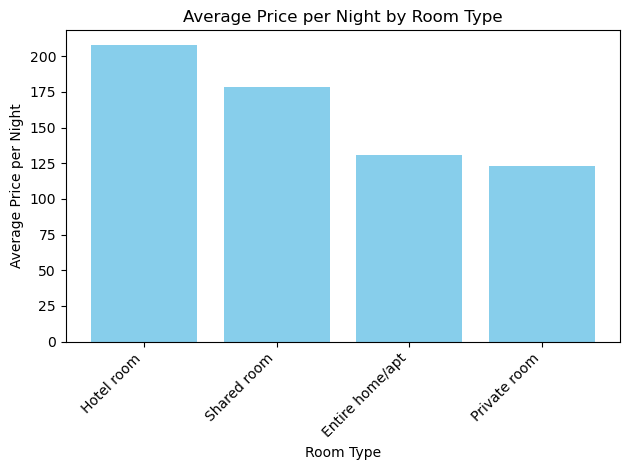

In [213]:
# Bar chart for Average Price per Night by Room Type

plt.bar(grouped_room_type['room_type'], grouped_room_type['price_per_night'], color='skyblue')
plt.xlabel('Room Type')
plt.ylabel('Average Price per Night')
plt.title('Average Price per Night by Room Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As shown the Hotel room is the highest in the pricing list and the room types has a great impact on the pricing

In [214]:
## Sort the grouped_neighbourhood data by price_per_night for better visulaization

grouped_neighbourhood  = grouped_neighbourhood .sort_values(by='price_per_night', ascending=False)

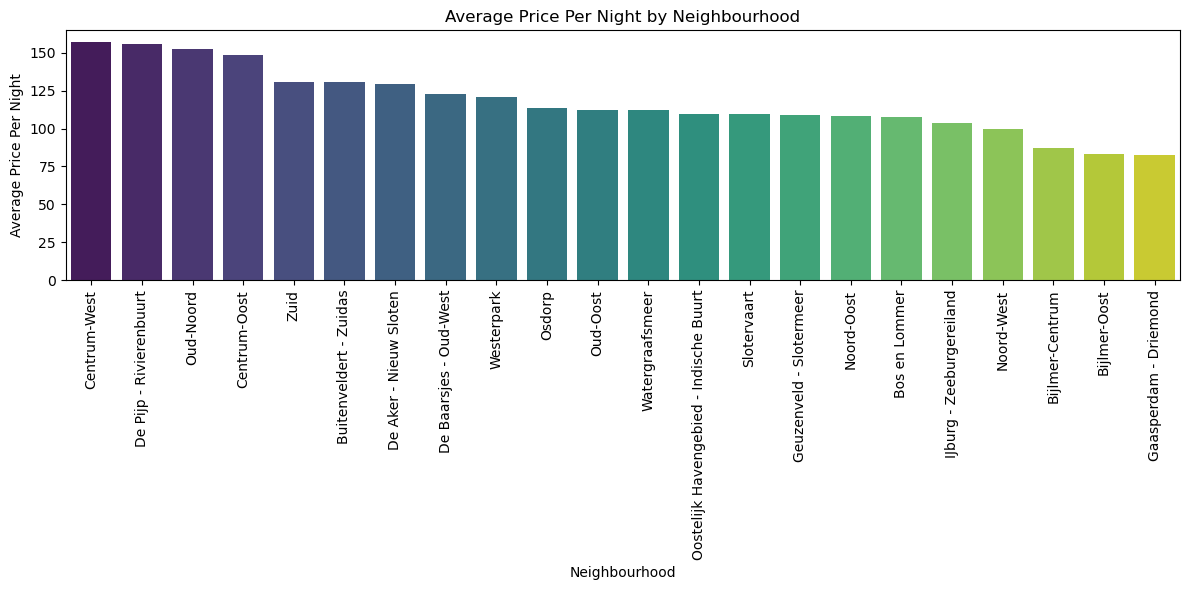

In [215]:
# Bar chart forAverage Price Per Night by Neighbourhood

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_neighbourhood, x='neighbourhood', y='price_per_night', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price Per Night')
plt.title('Average Price Per Night by Neighbourhood')
plt.tight_layout()
plt.show()

In [216]:
# Sort the grouped_neighbourhood data by price_per_night for better visulaization
grouped_neighbourhood  = grouped_neighbourhood .sort_values(by='number_of_reviews', ascending=False)

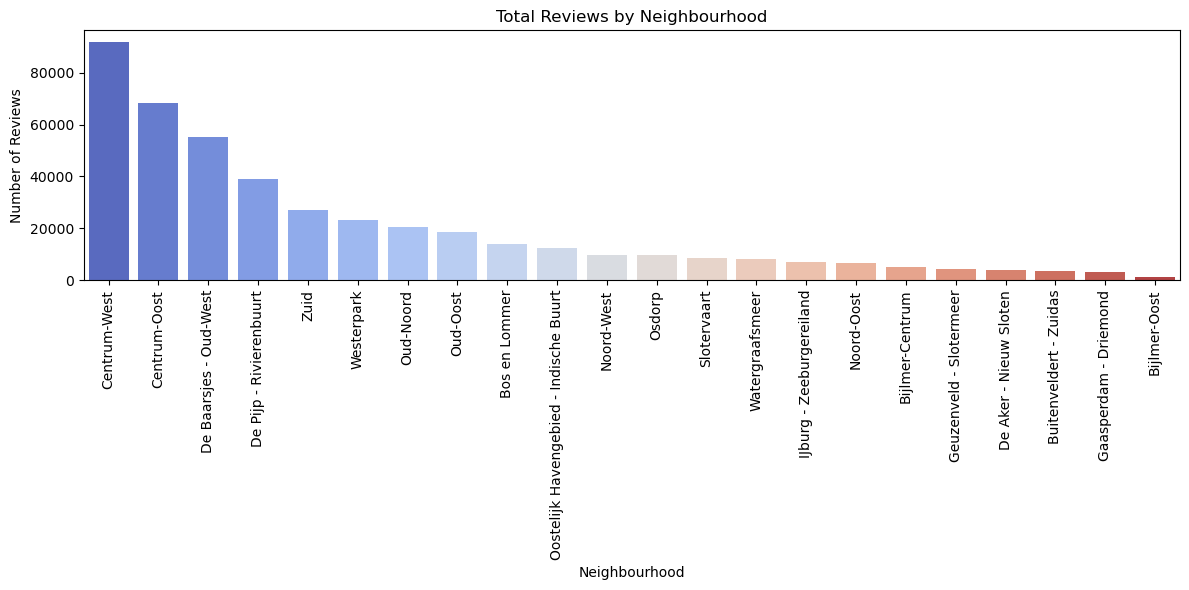

In [217]:
# Bar chart for Number of Reviews by Neighbourhood
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_neighbourhood, x='neighbourhood', y='number_of_reviews', palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Reviews')
plt.title('Total Reviews by Neighbourhood')
plt.tight_layout()
plt.show()

The graph indicate that the neighborhood has an effect to the client reviews

### 3.Conclusion:

Notes of our data analysis:

A list of 3790 listings was found without any pricing information
This significantly impacts data integrity and by diluting the price range of our analysis, as pricing is considered critical data.

#### To recap, we had three key questions we aimed to answer using our data:

1-Does the room type affect the pricing?

Our analysis shows that hotel listings tend to have the highest rate per night compared to other room types, indicating that room type does impact pricing.

2-How does the neighborhood impact the price of a listing?

In our analysis, we found that the highest-priced neighborhood is De Pijp - Rivierenbuurt, rather than the most reviewed neighborhood. Based on this insight, we recommend revisiting the pricing strategy for listings in this neighborhood to better align with the market.

3-What factors impact client reviews?

Our analysis revealed that two main factors influence the number of reviews and overall traffic in a neighborhood: location and pricing. Listings with competitive pricing and a location near popular areas (such as Centrum-West) tend to attract higher traffic and generate more positive reviews.

By this, we have come to the end of our analysis.
### Thank you